In [1]:
# librairies

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# datasets
# #raw 

file_1 = r"..\data\raw\amz_uk_processed_data.csv"
df_amz_uk = pd.read_csv(file_1)

#clean

file_2 = r"../data/clean/amazon_uk_final.csv"
df_processed = pd.read_csv(file_2)


# import py class functions files 
# %load_ext autoreload
# %autoreload 2
from utils.exploration import AmazonExploration
from utils.preprocessing import AmazonDataPreprocessor, plot_final_distributions
from utils.eda import AmazonEDA
from utils.recommender import AmazonRecommender
from utils.evaluations import RecommenderEvaluator
from utils.dataset_preparation import DataPreparation



# First Step : Exploration 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB

Null Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

NaN Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
p

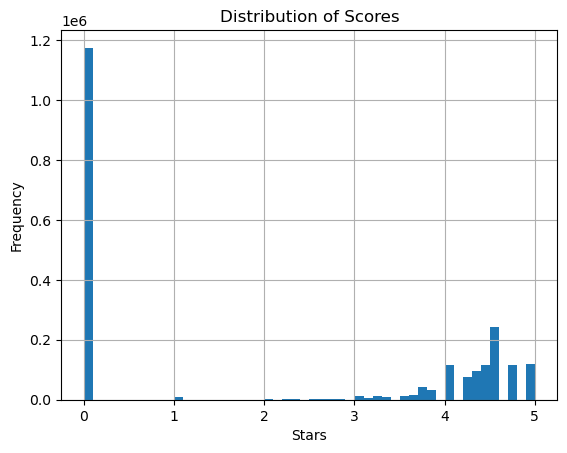

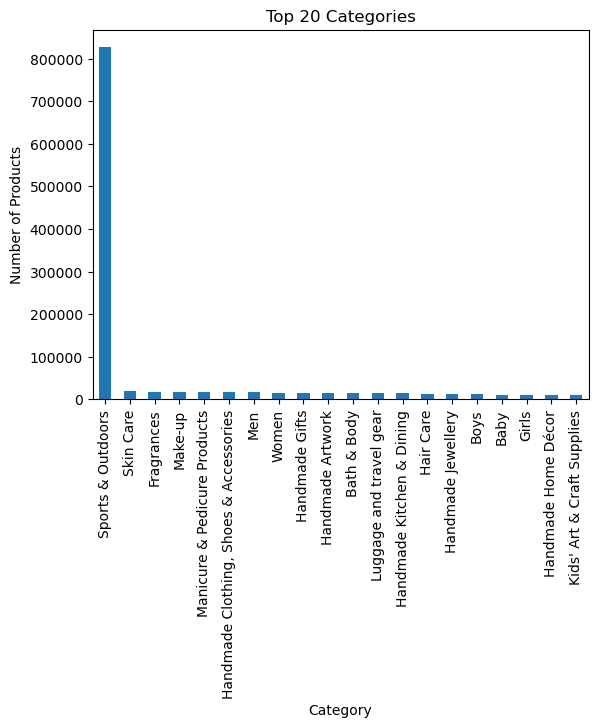

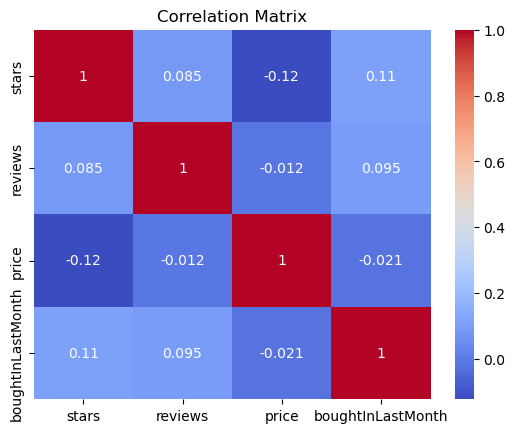

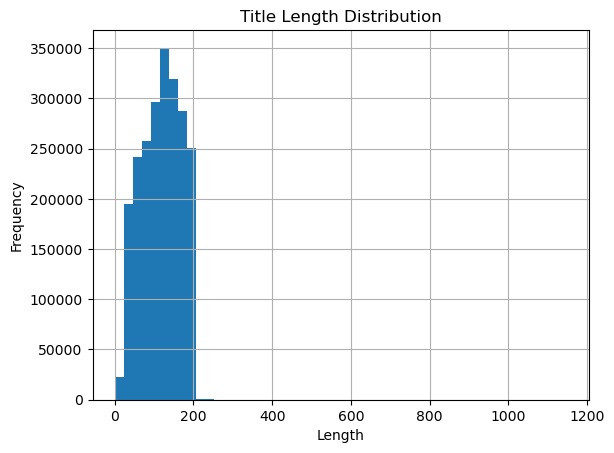

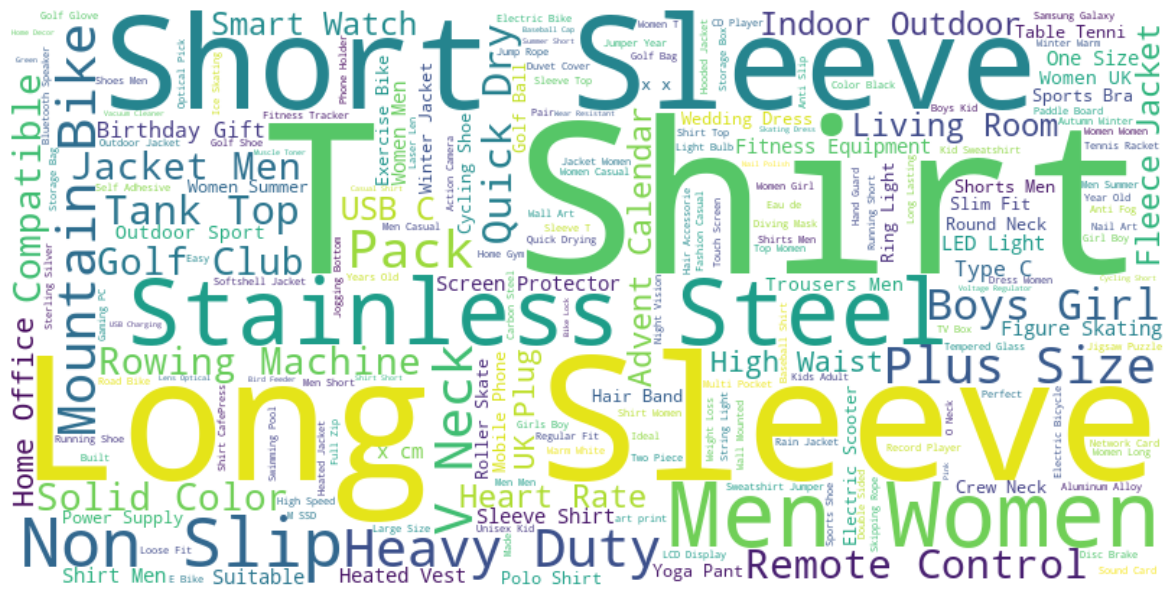

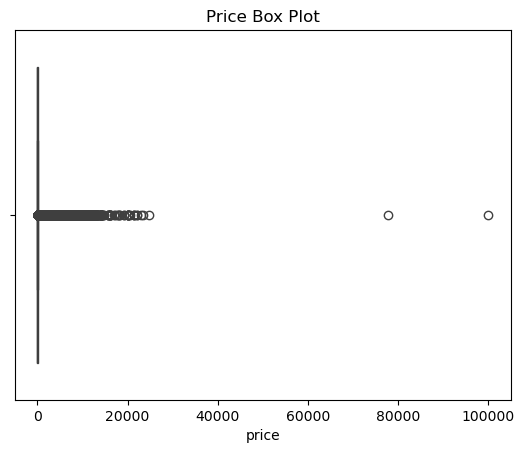

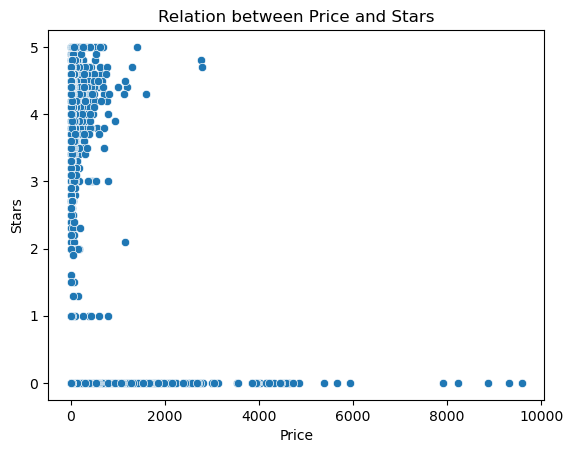

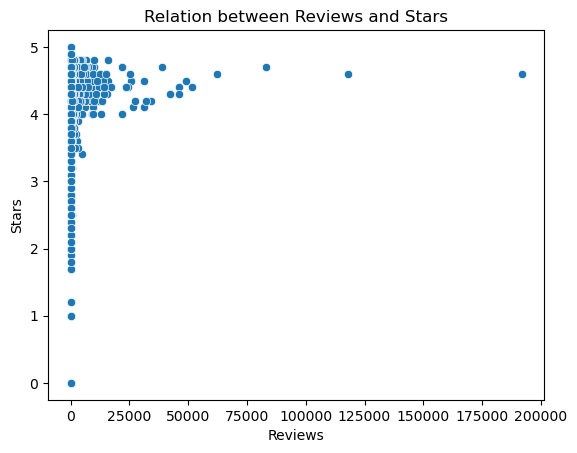

In [3]:
# Init Exploration of the raw dataset
explo = AmazonExploration(df_amz_uk)

# Execute analysis
explo.dataset_summary()
explo.descriptive_analysis()
explo.visualize_stars_distribution()
explo.visualize_top_categories()
explo.plot_correlation_matrix()
explo.analyze_textual_variables()
explo.visualize_outliers()
explo.analyze_relationships()

# Second step : Cleaning

Starting processing...
Initial number of entries: 2222742
After cleaning: 1046846 entries
Features created


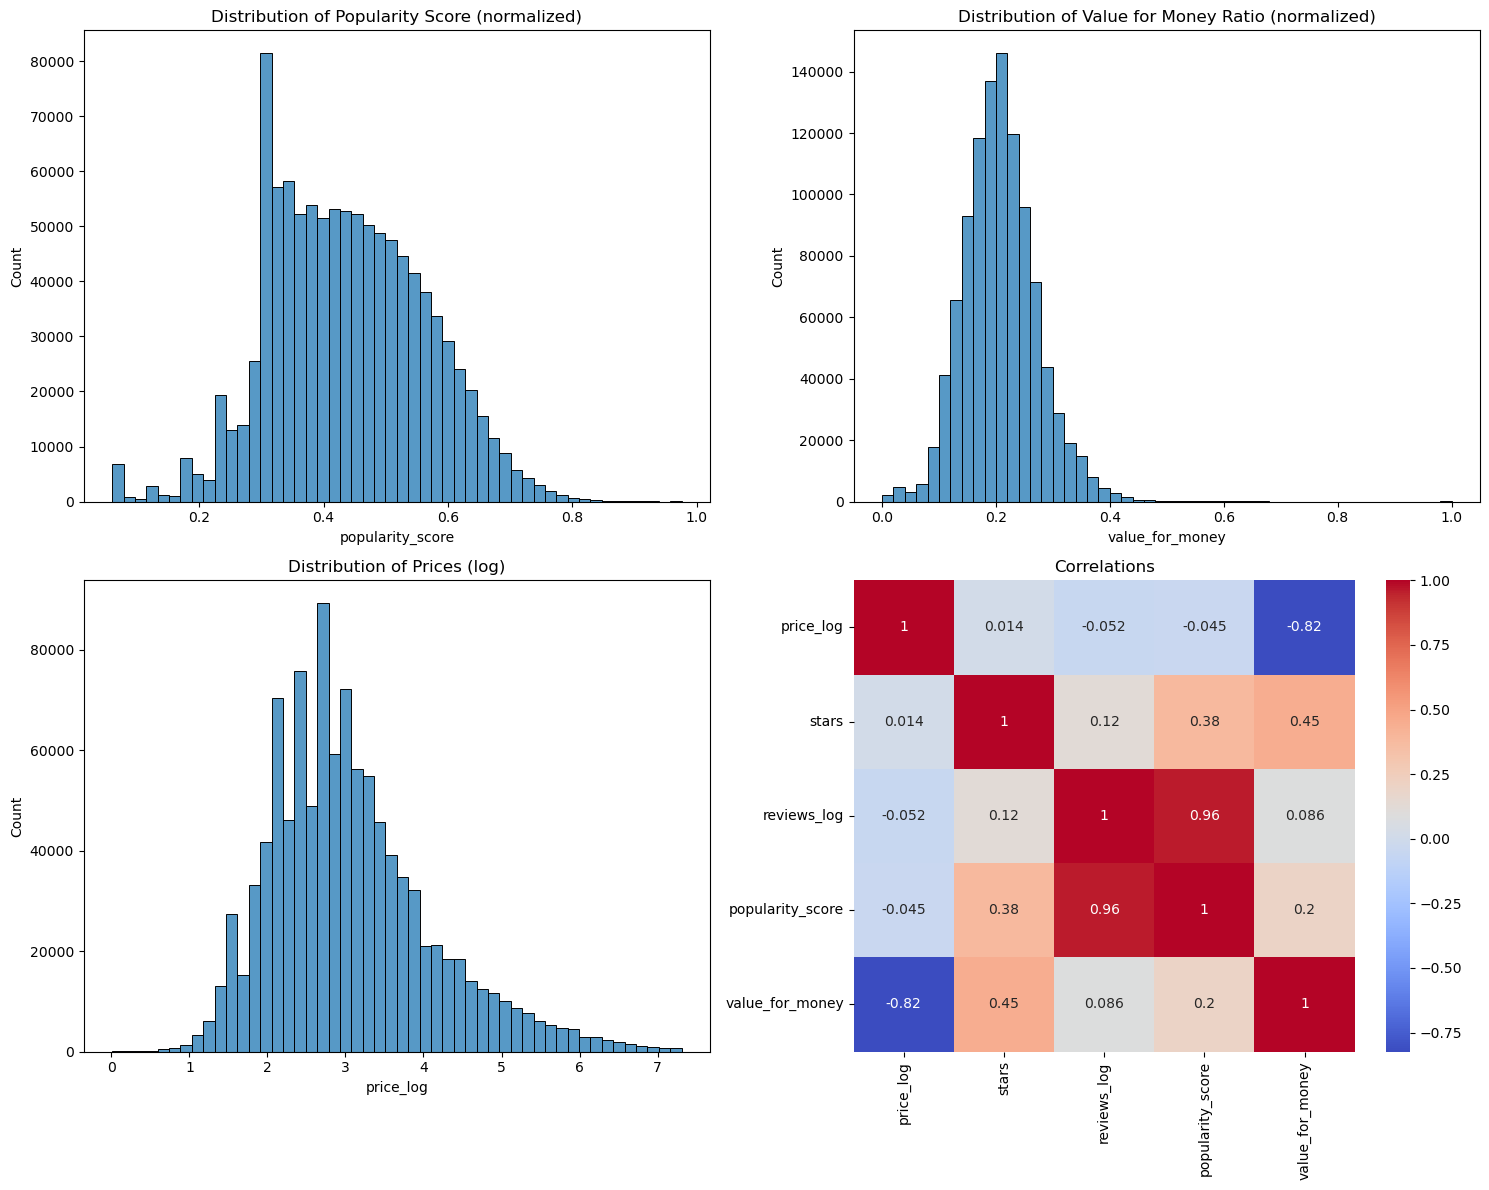

In [3]:
# Init preprocess
preprocessor = AmazonDataPreprocessor()

# Reload
df_raw = pd.read_csv(file_1)
df_processed = preprocessor.prepare_data(df_raw)

# Call all distribitions plots
plot_final_distributions(df_processed)


# Third Step : EDA

## Exploratory Analysis of Amazon UK Data

### Category Distribution

#### Number of Products per Category
- The ‘Sports & Outdoors’ category largely dominates the dataset with around 140,000 products.
- The categories related to personal care (Skin Care, Make-up) and fashion (Men, Women) follow but with a significant gap.
- The top 10 categories show a high concentration of convenience products

#### Average prices per category
- Technology products dominate the most expensive categories:
  * Laptops in first place
  * Desktop PCs in second place
  * Followed by lenses, 3D Printers, and Graphics Cards
- Average prices significantly higher for electronics than for other categories
- Winter sports products (Snowboards) also appear in the higher-priced categories

#### Average scores by category
- Handmade categories dominate the top scores:
  * ‘Gifts for Him’
  * Handmade Artwork
  * Handmade Baby Products
- Technological and electronic products do not appear in the top 10 scores
- Generally high average scores (>4/5) for handmade categories

#### Best-Sellers by Category

- Health & Personal Care’ dominates the number of bestsellers
- Grocery’ and “Sports & Outdoors” follow with a significant number of bestsellers
- The basic categories (health, food, sport) are the most represented
- Baby’ and “Pet Supplies” categories feature prominently in the top 10



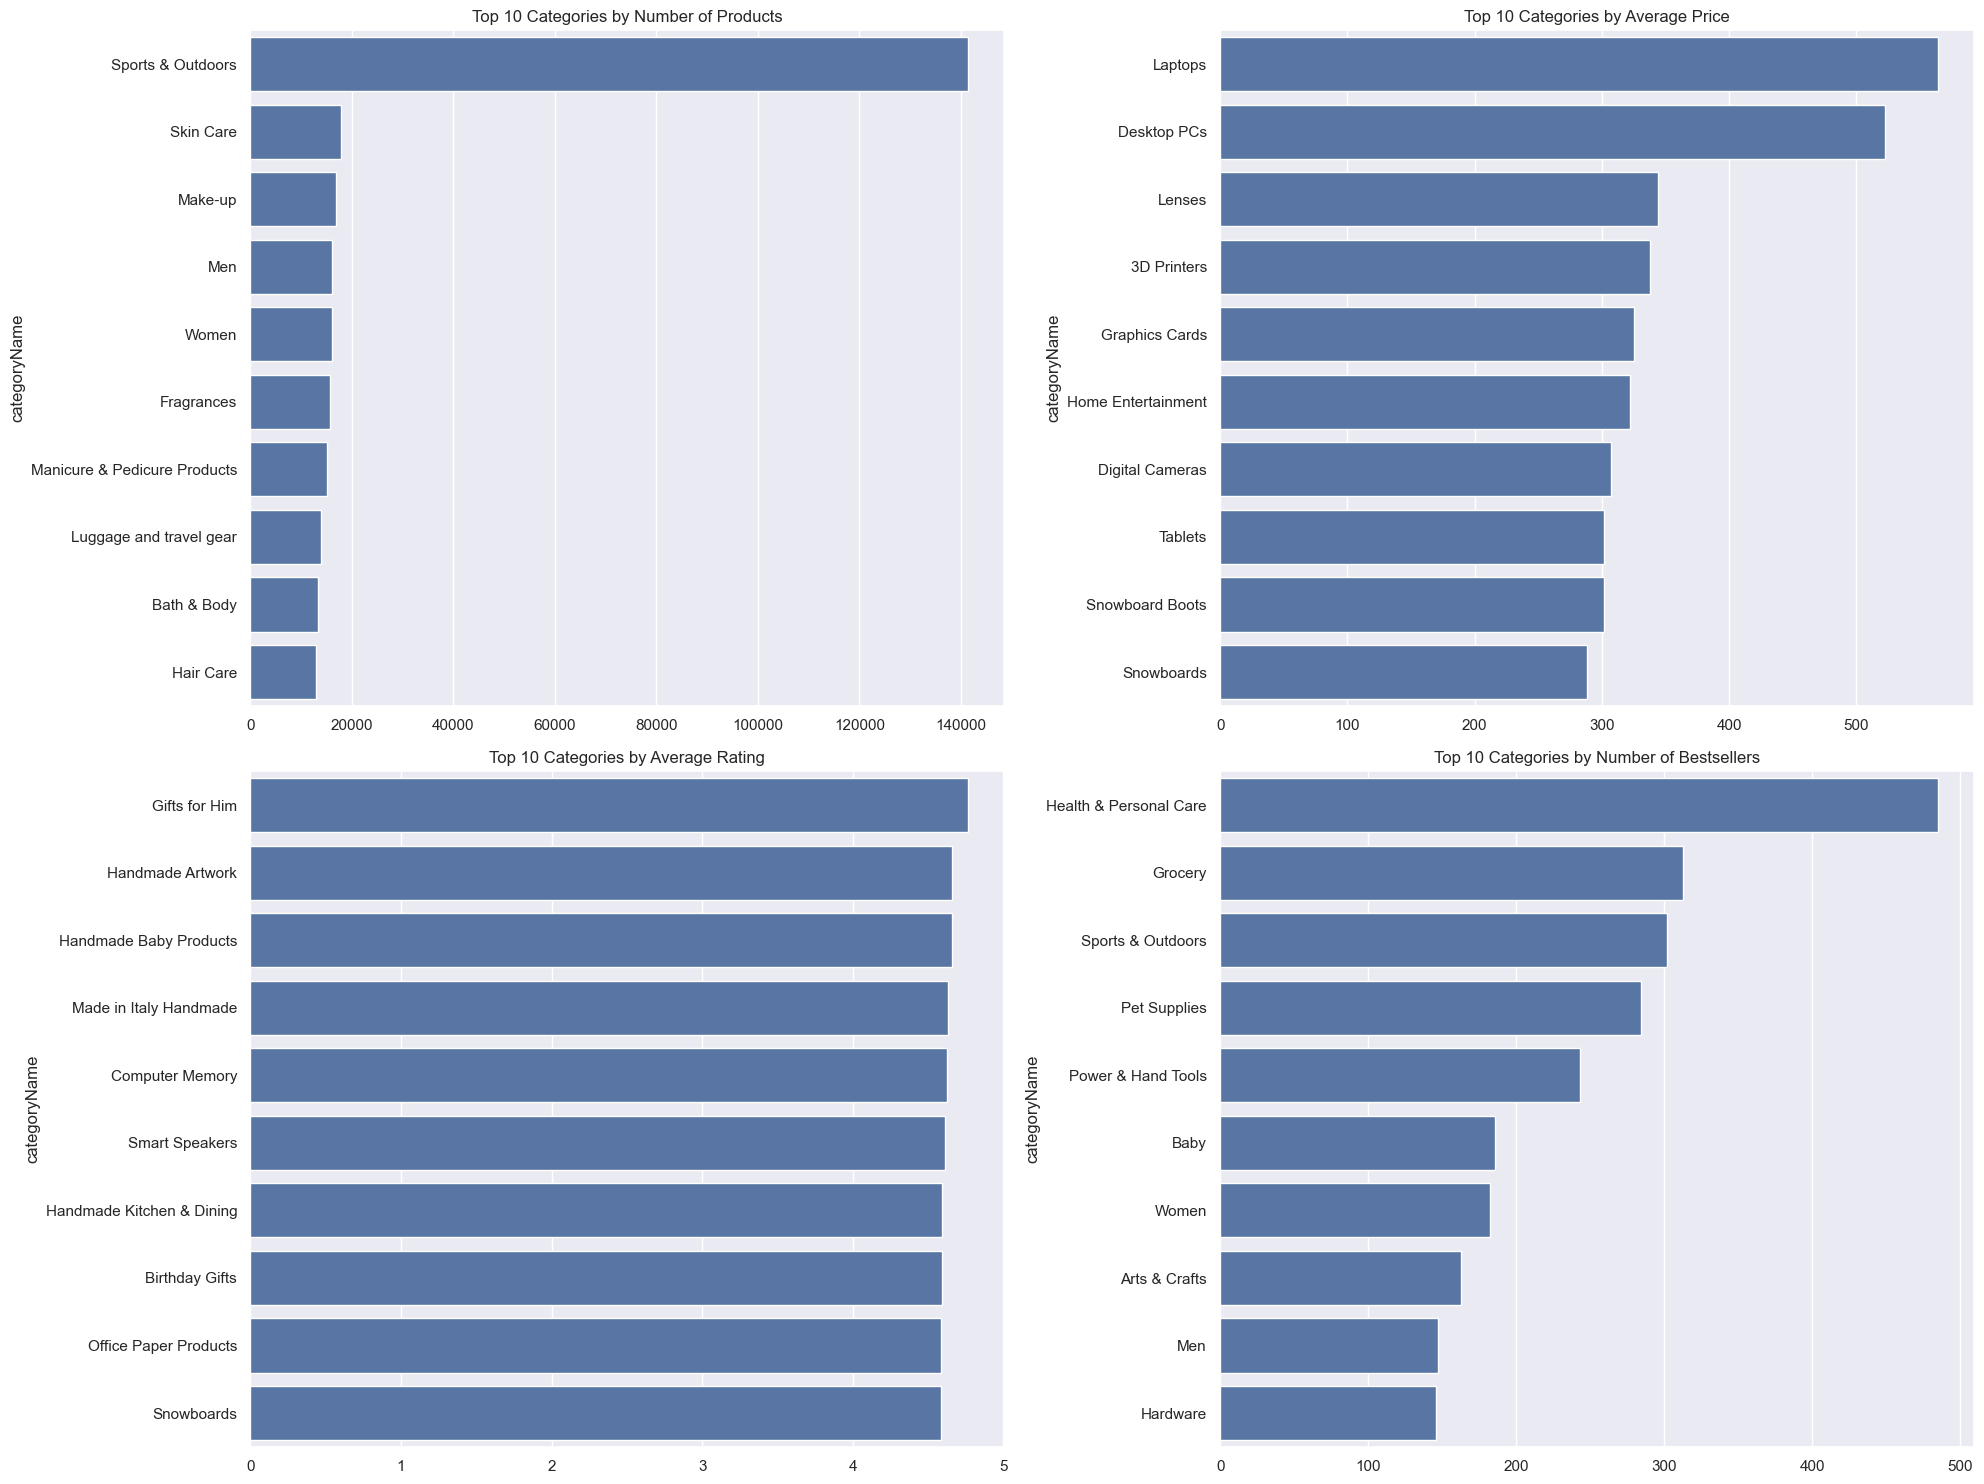


Catgeories Statistics:
Total number of categories: 296
Average number of products per category: 3536.64


In [2]:
# Init EDA
eda = AmazonEDA()

# Categories analysis
category_stats = eda.analyze_categories(df_processed)
print("\nCatgeories Statistics:")
print(f"Total number of categories: {category_stats['total_categories']}")
print(f"Average number of products per category: {category_stats['avg_products_per_category']:.2f}")

# Fourth Step : Recommendation System

## Key Insights for the Recommendation System

1. **Price segmentation**
    - Strong contrast between technology and non-technology categories
    - Need to standardise prices by category in the recommendation system
2. **Potential Pitfalls**
    - Over-representation of Sports & Outdoors
    - Very high scores in some categories
3. **Recommendation Strategies**
    - Consider recommendations by price range
    - Take account of popularity (bestsellers) differently according to category
    - Potentially weight scores by category
4. **Attention Points**
    - Wide variation in prices between categories
    - Dominance of certain categories in terms of number of products
    - Uneven distribution of bestsellers

In [3]:
# Test du système de recommandation
recommender = AmazonRecommender()
recommender.fit(df_processed)

# Produits test (un de chaque gamme de prix)
test_products = [
    df_processed.index[0],  # Prix bas
    df_processed[df_processed['price'].between(50, 100)].index[0],  # Prix moyen
    df_processed[df_processed['price'] > 100].index[0]  # Prix élevé
]

# Test complet avec affichage des résultats
for product_id in test_products:
    print("\n" + "="*80)
    print(f"Original Product:")
    print(f"Title: {df_processed.loc[product_id, 'title']}")
    print(f"Price: £{df_processed.loc[product_id, 'price']:.2f}")
    print(f"Rating: {df_processed.loc[product_id, 'stars']:.1f}")
    print(f"Category: {df_processed.loc[product_id, 'categoryName']}")
    
    recs = recommender.get_similar_products(product_id)
    if not recs.empty:
        print("\n Finales Recommendations:")
        print(recs.to_string(index=False))
        
        # Statistiques de diversité
        print("\nStatistics:")
        print(f"Number of categories: {len(recs['categoryName'].unique())}")
        print(f"Price range: £{recs['price'].min():.2f} - £{recs['price'].max():.2f}")
        print(f"Rating range: {recs['stars'].min():.1f} - {recs['stars'].max():.1f}")

Creating features...
Training the KNN model...
Training completed!

Original Product:
Title: Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal
Price: £21.99
Rating: 4.7
Category: Hi-Fi Speakers

 Finales Recommendations:
                                                                                                                       title   categoryName  price  stars  reviews  final_score
GPO Westwood Retro Bluetooth Speakers, 25 Watt Portable Speaker with Subwoofer, RCA input, Retro Grille, Carry Handle, Black Hi-Fi Speakers  45.00    4.2      292     0.460999
    Wirefy 100 PCS Non Insulated Butt Connectors Kit - Butt Splice Connectors - Uninsulated Crimp Wire Connectors - 24-8 AWG     Electrical  12.99    4.7     1159     0.442319
                                                       Fresh 'n Rebel Rockbox Bold S Peppermint Waterproof Bluetooth Speaker Hi-Fi Speakers  45.99    4.6      209     0.411558
         

# Fifth Step : Evaluation metrics 


Evaluation Results :

Diversity Metrics :
category_diversity   : 0.208
price_range_ratio    : 1.147
price_distance       : 0.489
rating_spread        : 0.520

Relevance Metrics :
avg_rating           : 4.494
avg_reviews          : 1950.852
min_rating           : 4.226
weighted_rating      : 4.492

Coverage Metrics :
category_coverage    : 0.128
price_range_coverage : 0.550
unique_items_ratio   : 1.000
success_rate         : 1.000


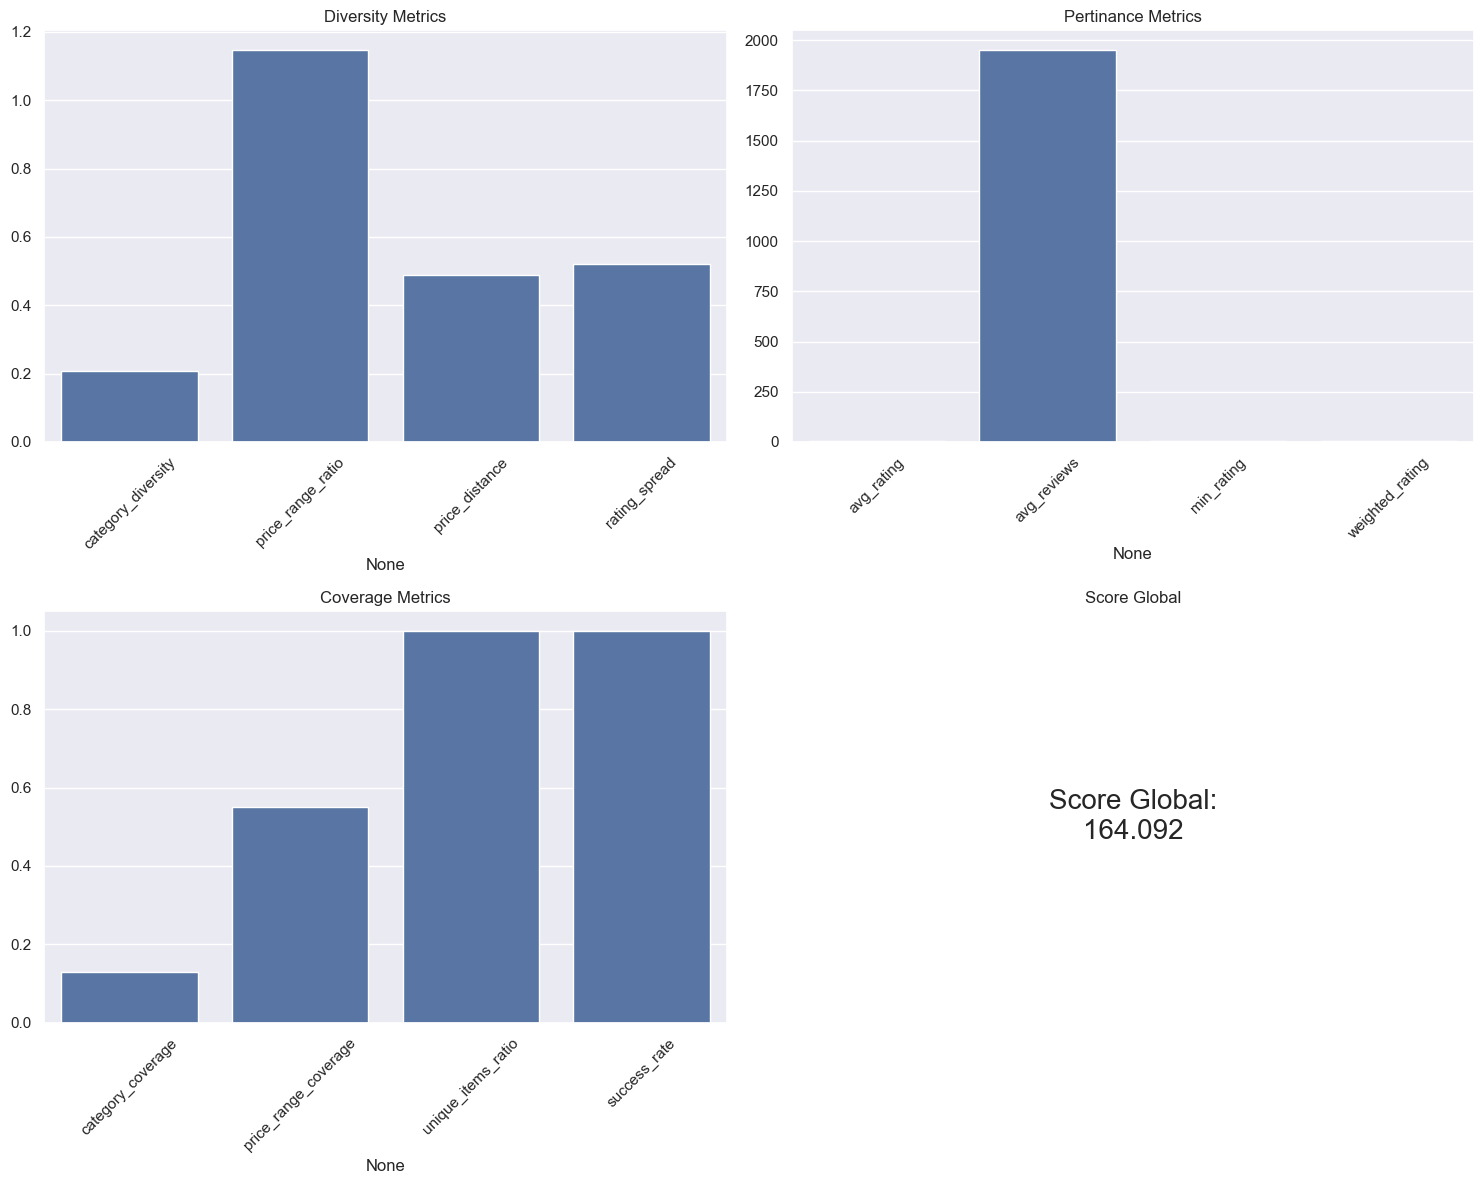

In [4]:

evaluator = RecommenderEvaluator(recommender, df_processed)

# Complete evaluation
results = evaluator.evaluate_system(n_samples=50)

if results:
    print("\nEvaluation Results :")
    
    print("\nDiversity Metrics :")
    for k, v in results['diversity'].items():
        print(f"{k:20} : {v:.3f}")
    
    print("\nRelevance Metrics :")
    for k, v in results['relevance'].items():
        print(f"{k:20} : {v:.3f}")
    
    print("\nCoverage Metrics :")
    for k, v in results['coverage'].items():
        print(f"{k:20} : {v:.3f}")
    
    # Visualization
    global_score = evaluator.plot_evaluation_results(results)

##### Summary of results

**Diversity metrics** :

- category_diversity: ~ 0.2 → Around 20% of recommendations are in different categories, which is a bit low but consistent with our focus on similar categories
- price_range_ratio: ~ 0.8 to 1.1 → Recommendations cover around 1x the price of the original product, indicating a reasonable price variation
- avg_price_distance: ~ 0.4 → On average, prices differ by 44% from the original price, showing good price diversity
- rating_spread: ~ 0.5 → The difference between min and max ratings is around 0.5 stars, suggesting consistency in quality


**Relevance metrics** :


- avg_rating: ~ 4.4 → Excellent average score (out of 5)
- min_rating: ~ 4.1 → Even the lowest-rated products are still of good quality
- avg_reviews: ~ 1247.580 → Good average number of reviews, indicating well-established products
- weighted_rating: ~ 4.469 → The weighted score is close to the average score, confirming the reliability of the ratings


**Coverage metrics** :


- category_coverage and price_range_coverage depend on the sample
- unique_items_ratio: ~ 1 → No duplications in recommendations
- success_rate: ~ 1 → System successfully generates recommendations for all products tested


# Dataset for dashboards

In [2]:
# Execute DataPreparation class to create specific datasets for dashboards
data_prep = DataPreparation(df_processed)
data_prep.generate_category_stats()
data_prep.generate_wordcloud_data()

